<h1>Injured in Madrid due to traffic accidents during 2019</h1>
<h4>by Iván Lucas López</h4>



### Table of Contents

1. [Business Understanding](#Business)
2. [Data Understanding](#Data)
3. [Data Preparation](#Preparation)
4. [Modeling](#Modeling)
5. [Evaluation](#Evaluation)


## Business Understanding <a name="Business"></a>

**Study on traffic accidents in Madrid**

For this project, I was interestested in using El Ayuntamiento de Madrid data from 2019 about traffic accidents to better understand:

1. How many traffic accident occurred in Madrid during 2019?, 
  How many people are involved? and 
  What is the average number of people involved in a traffic accident?
  
2. What day of the week are there the most accidents?

3. What time do most accidents occur?

4. At what age are more traffic accidents suffered?

## Data Understanding <a name="Data"></a>

The dataset can be find in: 
https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c2843010d9c3610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

First the code to import the necesary **libraries** and the **dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('2019_Accidentalidad.csv', sep=';' , encoding='latin-1')
df.head()

,N_EXPEDIENTE,FECHA,HORA,CALLE,NUMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLOGICO,TIPO VEHICULO,TIPO PERSONA,RANGO EDAD,SEXO,LESIVIDAD
0,2019S000020,01/01/2019,23:30,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Despejado,Ciclomotor,Conductor,DE 25 A 29 AÑOS,Hombre,1.0
1,2019S000017,01/01/2019,22:15,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Mujer,14.0
2,2019S000017,01/01/2019,22:15,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,DE 35 A 39 AÑOS,Hombre,3.0
3,2019S001812,01/01/2019,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Hombre,14.0
4,2019S001812,01/01/2019,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,7.0


### Rename the columns seems a good idea in orther to create a dataset understable in English languaje

In [2]:
df.rename(columns={'N_EXPEDIENTE': 'exp','FECHA': 'date'
                  ,'CALLE': 'street' ,'NUMERO': 'number'
                  ,'DISTRITO': 'district' ,'TIPO VEHICULO': 'vehType'
                  ,'ESTADO METEREOLOGICO': 'weather' ,'TIPO ACCIDENTE': 'accType'
                  ,'TIPO PERSONA': 'person' ,'RANGO EDAD': 'age'
                  ,'SEXO': 'sex' ,'LESIVIDAD': 'injuries' ,'HORA': 'time'}, inplace=True)

In [3]:
df.columns

Index(['exp', 'date', 'time', 'street', 'number', 'district', 'accType',
       'weather', 'vehType', 'person', 'age', 'sex', 'injuries'],
      dtype='object')

## Data Preparation <a name="Preparation"></a>

### Let's create some aditional columns based on the date of the accident and the hour

In [4]:
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y") #This gives datetime format to the 'date' variable
df['hour'] = pd.to_datetime(df['time']).dt.hour #This create a variable named 'hour' with the accident hour
df['year'] = pd.DatetimeIndex(df['date']).year  #This create a variable named 'year' with the year of the accident
df['month'] = pd.DatetimeIndex(df['date']).month #This create a variable named 'month' with the month of the accident
df['day'] = pd.DatetimeIndex(df['date']).day  #This create a variable named 'day' with the day of the accident
df['day_of_week'] = df['date'].dt.weekday_name #This create a variable named 'day_of_week' with the day of the week 
df.head()

,exp,date,time,street,number,district,accType,weather,vehType,person,age,sex,injuries,hour,year,month,day,day_of_week
0,2019S000020,2019-01-01,23:30,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Despejado,Ciclomotor,Conductor,DE 25 A 29 AÑOS,Hombre,1.0,23,2019,1,1,Tuesday
1,2019S000017,2019-01-01,22:15,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Mujer,14.0,22,2019,1,1,Tuesday
2,2019S000017,2019-01-01,22:15,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,DE 35 A 39 AÑOS,Hombre,3.0,22,2019,1,1,Tuesday
3,2019S001812,2019-01-01,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Hombre,14.0,21,2019,1,1,Tuesday
4,2019S001812,2019-01-01,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,7.0,21,2019,1,1,Tuesday


### Using dictionaries, rename the columns values in orther to create a dataset understable in English languaje

In [5]:
#create de dictionaries

di = {'Hombre': "Man", 
      'Mujer': "Woman"}

di2 = {'Despejado': "Clear", 
       'Lluvia débil': "Rain", 
       'Nublado': "Cloudy", 
       'Se desconoce': "Other" ,
       'LLuvia intensa': "HeavyRain",
       'Granizando': "Hail",
       'Nevando': "Snow",}

di3 = {'DE 0 A 5 AÑOS': "a.[0,5]"
       ,'DE 6 A 9 AÑOS': "b.[6,9]"
      ,'DE 10 A 14 AÑOS': "c.[10,14]"
      ,'DE 15 A 17 AÑOS': "d.[15,17]"
      ,'DE 18 A 20 AÑOS': "e.[18,20]"
      ,'DE 21 A 24 AÑOS': "f.[21,24]"
      ,'DE 25 A 29 AÑOS': "g.[25,29]"
      ,'DE 30 A 34 AÑOS': "h.[30,34]"
      ,'DE 35 A 39 AÑOS': "i.[35,39]"
      ,'DE 40 A 44 AÑOS': "j.[40,44]"
      ,'DE 45 A 49 AÑOS': "k.[45,49]"
      ,'DE 50 A 54 AÑOS': "l.[50,54]"
      ,'DE 55 A 59 AÑOS': "m.[55,59]"
      ,'DE 60 A 64 AÑOS': "n.[60,64]"
      ,'DE 65 A 69 AÑOS': "o.[65,69]"
      ,'DE 70 A 74 AÑOS': "p.[70,74]"
      ,'MAYOR DE 74 AÑOS': "q.[75,.)"
      ,'DESCONOCIDA': "w.[Unknown]"}

di4 = {'Conductor': "Driver", 
       'Pasajero': "Passenger", 
       'Peatón': "Pedestrian"}

There are many ways to deal with missing values.

When I do an Exploratory Data Analisys.[here](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

I usually follow the next rules (which I find really useful in my daily profesional life):
1. Try to understand the variable before dealing with missing values.(how is it collected?, Expected values...)
2. Only delete a variable if it's clear that it gives no relevant information.
3. Only delete a row with a missing value if it gives no relevant infomation.
4. Fill NaN with another value of the variable only if its clear that the value chosen is the correct one.
5. If point 4 can not be applied, then fill NaN with a new value that allows us to now that it is a missing value.

Why do I use this rules?
1. If the missing values are generated by a IT mistake, they will be easier to report and solve.
2. This way it is easier to find out if the missing values have an effect on other variables.

In [6]:
def use_dict(df,vari, dicti, comple):
    """ 
    Summary line. 
    This function has been created to deal with the variables that I want to modify using a dictionary
    also to deal with the missing values filling them with a value choosen by me.
    In this case I think that the best option is the fifth rule. 
      
    Parameters: 
    - df: the dataframe in which we want to apply the dictionary and to fill NaN
      
    - vari: variable 
      
    - dicti: the dictionary we want to apply
      
    - comple: the value chosen to fill NaN
      
    Returns: 
    df where the chosen variable has replaced its values with the dictionary ones 
    also the missing values have been replaced by the chosen value 'comple'.
      
    """
    df=df.replace({vari: dicti})
    df[vari].fillna(comple, inplace=True) 
    return df
    

# variables data = [variable, dictionary, value for NaN]
subjects =[["sex",     di,"Other"],       # variable1
           ["weather",di2,"Other"],       # variable2
           ["age",    di3,"w.[Unknown]"], # variable3
           ["person", di4,"Other"]]       # variable4

for sub in subjects:
    df = use_dict(df,sub[0], sub[1], sub[2])

In [8]:
df.head()

,exp,date,time,street,number,district,accType,weather,vehType,person,age,sex,injuries,hour,year,month,day,day_of_week
0,2019S000020,2019-01-01,23:30,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Clear,Ciclomotor,Driver,"g.[25,29]",Man,1.0,23,2019,1,1,Tuesday
1,2019S000017,2019-01-01,22:15,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Clear,Turismo,Driver,"j.[40,44]",Woman,14.0,22,2019,1,1,Tuesday
2,2019S000017,2019-01-01,22:15,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Clear,Ciclomotor,Driver,"i.[35,39]",Man,3.0,22,2019,1,1,Tuesday
3,2019S001812,2019-01-01,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Clear,Turismo,Driver,"j.[40,44]",Man,14.0,21,2019,1,1,Tuesday
4,2019S001812,2019-01-01,21:40,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Clear,Turismo,Driver,"h.[30,34]",Woman,7.0,21,2019,1,1,Tuesday


## Modeling <a name="Modeling"></a>

 Before dealing with the questions weshould keep in mind this dataset includes:
 
  - Traffic accidents in the City of Madrid registered by the Municipal Police in 2019.
  - One record is included per person involved in the accident.
  - Witness records not included.

### Q1.1. - How many people are involved in a traffic accident in Madrid during 2019?

One record is included per person involved in the accident. To answer this quetion we have to know the number of rows in our dataset.

In [9]:
#number of people involved in a car accident ocurred during 2019
df.shape[0]

51806

### Q1.2. - How many car accident occurred during 2019?

One record is included per person involved in the accident.
That means that one single accident could have more than one record.
The variable exp is unique for every accident, so to answer this quetion we have to know the number of different exp in our dataset.

In [10]:
#number of accident ocurred during 2019
df1 = df.drop_duplicates(subset=['exp'])
df.drop_duplicates(subset=['exp']).shape[0]

21935

### Q1.3. - What is the average number of people involved in a traffic accident?

On average, at least two people are affected in each accident

In [11]:
#Average number of people affected
df.shape[0]/df1.shape[0]

2.361796216093002

### Q2 - What day of the week are there the most accidents?

Taking into account the number of files:

**Friday** is the day with the highest number of accidents

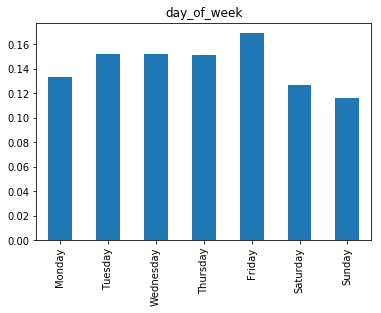

In [12]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
count_vals = df.day_of_week.value_counts()

(count_vals/df.shape[0]).loc[day_order].plot(kind="bar");
plt.title("day_of_week");

Taking into account the number of files created by the police: 

**Friday** is the day with the highest number of accidents

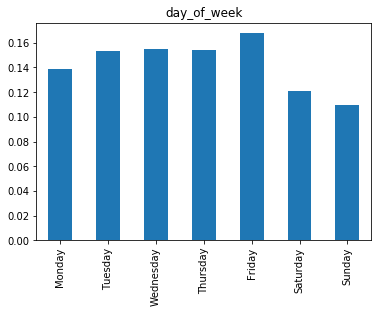

In [13]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
count_vals = df1.day_of_week.value_counts()

(count_vals/df1.shape[0]).loc[day_order].plot(kind="bar");
plt.title("day_of_week");

### Q3 - What time do most accidents occur?

Most claims occur **at 6 p.m.**, coinciding with time to **return** home from work or school.

It is clear that the frequency increases at **8 and 9 a.m.** coinciding with the time to **go to work or school.**

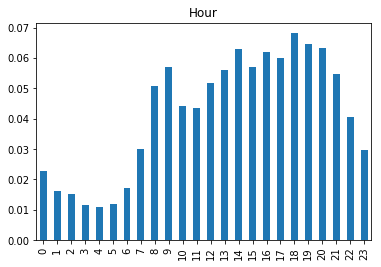

In [14]:
count_vals = df1.hour.value_counts().sort_index()

(count_vals/df1.shape[0]).plot(kind="bar");
plt.title("Hour");

#### Does the pattern change over the weekend?

In [15]:
#code to create a dataframe with the week involved in accidents 
#I will consider Friday as part of the weekend, because is when the party stars
df_week = df[df['day_of_week'].isin(["Monday", "Tuesday", "Wednesday", "Thursday"])]

# % of the total people involved in an accident by hour  
dd=(df_week.hour.value_counts().sort_index()/df_week.shape[0]*100).rename_axis('hour').reset_index(name='perc_week')
dd.set_index('hour', inplace=True)

In [16]:
#code to create a dataframe with the week involved in accidents 
df_weekend = df[df['day_of_week'].isin(["Friday", "Saturday", "Sunday"])]
dd2=(df_weekend.hour.value_counts().sort_index()/df_weekend.shape[0]*100).rename_axis('hour').reset_index(name='perc_weekend')
dd2.set_index('hour', inplace=True)

Clearly, accident hours change over the weekend.

Accidents increase during party hours which is from 10 p.m. until 6 a.m.

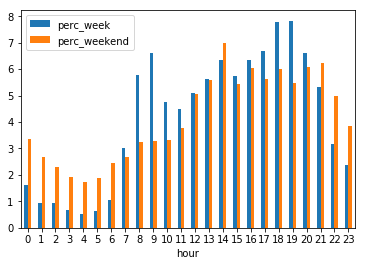

In [17]:
comp_df = pd.merge(dd, dd2, left_index=True, right_index=True)
comp_df.plot.bar(rot=0)

#### How much the pattern change over the weekend?

The number of people affected by accidents drops 50% at 9 a.m.

On the other hand, at 4 a.m. the number of people affected by accidents increases by 232%

In [18]:
comp_df = pd.merge(dd, dd2, left_index=True, right_index=True) # merge of the two database that I want to compare
comp_df.columns = ['perc_week', 'perc_weekend']
comp_df['Diff_perc_point'] = comp_df['perc_weekend'] / comp_df['perc_week']-1 #% of increase or decrease from week % 
comp_df.style.bar(subset=['Diff_perc_point'], align='mid', color=['#d65f5f', '#5fba7d'])

,perc_week,perc_weekend,Diff_perc_point
hour,,,
0,1.60819,3.36036,1.08953
1,0.918967,2.66204,1.89678
2,0.955069,2.28242,1.3898
3,0.662969,1.93092,1.91253
4,0.515278,1.71533,2.32894
5,0.623585,1.87468,2.00629
6,1.05681,2.45583,1.32381
7,3.02274,2.68548,-0.111577
8,5.79606,3.26194,-0.437214


### Q4 - At what age are more traffic accidents suffered?

Continuing with the study we are going to separate the working hours from the party hours

In [19]:
df_day = df[df['hour'].isin([7,8,9,10,11,12,13,14,15,16,17,18,19,20])] 
df_day = df_day[~df_day['age'].isin(['w.[Unknown]'])] 
dd=(df_day.age.value_counts().sort_index()/df_day.shape[0]*100).rename_axis('age').reset_index(name='perc_day')
dd.set_index('age', inplace=True)

In [20]:
df_party = df[df['hour'].isin([21,22,23,0,1,2,3,4,5,6])]
df_party = df_party[~df_party['age'].isin(['w.[Unknown]'])]
dd2=(df_party.age.value_counts().sort_index()/df_party.shape[0]*100).rename_axis('age').reset_index(name='perc_party')
dd2.set_index('age', inplace=True)

During the working hours, people between **40 and 44** years old are the ones who suffer the most traffic accidents

During party hours, people between the ages of **25 and 29** suffer the most traffic accidents

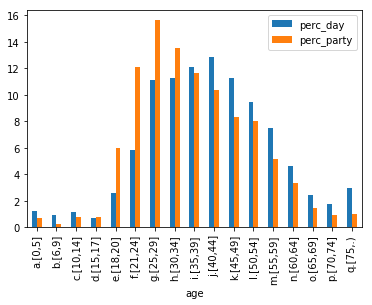

In [21]:
comp_df = pd.merge(dd, dd2, left_index=True, right_index=True)
comp_df.plot.bar()

#### How much the pattern change?

The greatest increase is seen in those between **18 and 20** years old with an increase of 134%

It is observed that the percentage of children between **6 and 9** years old decreases by 75%

In [22]:
comp_df = pd.merge(dd, dd2, left_index=True, right_index=True) # merge of the two database that I want to compare
comp_df['Diff_perc_point'] = comp_df['perc_party'] / comp_df['perc_day']-1
comp_df.style.bar(subset=['Diff_perc_point'], align='mid', color=['#d65f5f', '#5fba7d'])

,perc_day,perc_party,Diff_perc_point
age,,,
"a.[0,5]",1.23653,0.685553,-0.445582
"b.[6,9]",0.962959,0.231878,-0.759202
"c.[10,14]",1.13804,0.776288,-0.317874
"d.[15,17]",0.730426,0.776288,0.0627876
"e.[18,20]",2.56333,6.01875,1.34802
"f.[21,24]",5.87077,12.1383,1.06759
"g.[25,29]",11.1069,15.6266,0.406931
"h.[30,34]",11.2792,13.5094,0.197729
"i.[35,39]",12.0808,11.6645,-0.0344577


## Evaluation <a name="Evaluation"></a>

### Results

The main findings of the code can be found at the post available [here](https://i-lucas.medium.com/traffic-accidents-are-as-different-as-day-and-night-51b52458646d).